In [1]:
import pandas
import numpy
from scipy.stats import zscore

development = pandas.read_csv("./../../DSL_Winter_Project_2024/development.csv")

pmax_features = []
negpmax_features = []
tmax_features = []
area_features = []
rms_features = []

for i in range(0, 18):
    pmax_features.append("pmax[%s]" % (i))
    negpmax_features.append("negpmax[%s]" % (i))
    tmax_features.append("tmax[%s]" % (i))
    area_features.append("area[%s]" % (i))
    rms_features.append("rms[%s]" % (i))

all_features= pmax_features + negpmax_features + tmax_features + area_features + rms_features

In [2]:
development.head()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [3]:
development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [4]:
development.isnull().sum()

x              0
y              0
pmax[0]        0
negpmax[0]     0
area[0]        0
              ..
pmax[17]       0
negpmax[17]    0
area[17]       0
tmax[17]       0
rms[17]        0
Length: 92, dtype: int64

In [5]:
development[all_features].describe()

,pmax[0],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[7],pmax[8],pmax[9],...,rms[8],rms[9],rms[10],rms[11],rms[12],rms[13],rms[14],rms[15],rms[16],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,4.866423,16.510543,8.784017,26.457888,14.947826,39.333002,14.907669,4.849883,20.503279,12.505530,...,1.389921,1.377497,1.408877,1.415314,1.364507,1.411607,1.439037,1.370949,0.452944,0.371027
std,1.481220,16.781018,7.692692,25.397517,13.394484,27.899214,16.613431,1.487651,20.175681,13.862611,...,0.353814,0.349208,0.355428,0.356551,0.342913,0.358423,0.366330,0.350003,0.299456,0.081983
min,1.394440,2.028134,1.799435,2.034311,1.940271,2.476239,1.883002,1.591489,1.440403,1.727530,...,0.319754,0.294681,0.324462,0.312743,0.256888,0.327664,0.318347,0.302089,0.129428,0.102138
25%,4.123941,5.619728,4.681271,9.327397,5.744334,15.949420,5.402504,4.106779,6.471845,4.919528,...,1.138205,1.129018,1.155453,1.161411,1.120670,1.156713,1.178395,1.120797,0.342264,0.321753
50%,4.668321,10.068513,5.714713,15.071468,10.180335,28.257567,8.674725,4.649773,12.660268,6.996239,...,1.365886,1.353291,1.383982,1.391340,1.341183,1.386532,1.414197,1.346501,0.400117,0.366981
75%,5.265888,19.031319,9.796498,36.166834,17.985703,58.928515,16.197600,5.249033,25.451260,13.679469,...,1.614668,1.598699,1.635779,1.643028,1.582718,1.640055,1.672101,1.594086,0.466077,0.415578
max,20.515415,106.649066,68.837366,136.658588,90.635233,138.381650,128.199008,19.777481,128.185635,115.566028,...,6.390013,5.982645,6.006217,5.988877,6.379770,6.283808,6.007198,5.859994,5.031400,4.925181


In [6]:
development[pmax_features].describe()

,pmax[0],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[7],pmax[8],pmax[9],pmax[10],pmax[11],pmax[12],pmax[13],pmax[14],pmax[15],pmax[16],pmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,4.866423,16.510543,8.784017,26.457888,14.947826,39.333002,14.907669,4.849883,20.503279,12.505530,37.827489,22.118955,4.872721,41.233983,16.656853,104.181567,608.650804,609.060121
std,1.481220,16.781018,7.692692,25.397517,13.394484,27.899214,16.613431,1.487651,20.175681,13.862611,30.010446,21.599092,1.748889,27.992784,17.784631,16.031714,13.723698,13.928735
min,1.394440,2.028134,1.799435,2.034311,1.940271,2.476239,1.883002,1.591489,1.440403,1.727530,2.533267,1.935126,1.619556,2.727048,1.801639,49.502625,451.502789,456.816620
25%,4.123941,5.619728,4.681271,9.327397,5.744334,15.949420,5.402504,4.106779,6.471845,4.919528,13.758305,7.904691,4.045327,17.327409,5.720558,94.907836,598.888989,599.390156
50%,4.668321,10.068513,5.714713,15.071468,10.180335,28.257567,8.674725,4.649773,12.660268,6.996239,23.506975,13.388216,4.576996,33.571727,10.125145,102.724738,607.190645,607.202368
75%,5.265888,19.031319,9.796498,36.166834,17.985703,58.928515,16.197600,5.249033,25.451260,13.679469,59.207650,26.453506,5.171157,60.328537,18.720630,113.354999,616.837596,617.313303
max,20.515415,106.649066,68.837366,136.658588,90.635233,138.381650,128.199008,19.777481,128.185635,115.566028,141.439844,134.464426,20.501949,141.530914,115.792004,193.724947,665.267443,675.052221


In [7]:
development[negpmax_features].describe()

,negpmax[0],negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[7],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[12],negpmax[13],negpmax[14],negpmax[15],negpmax[16],negpmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,-5.046162,-9.187917,-5.596777,-13.964902,-8.454200,-20.186649,-8.814084,-5.309727,-12.218777,-8.171642,-21.218853,-12.597360,-5.641027,-22.280679,-9.865294,-5.237765,-42.152047,-46.921923
std,15.877804,29.955290,173.289844,68.418678,115.439999,17.294225,26.239272,106.865747,184.963808,73.012116,124.881360,101.812968,120.887383,35.573168,152.735946,150.181112,3.158175,3.478838
min,-7741.109923,-9930.114637,-10777.684263,-25502.557774,-42648.221376,-2135.126117,-10967.680437,-63107.687949,-86543.677185,-30718.927252,-57175.301549,-48053.652150,-48301.216027,-14186.920829,-39039.394697,-52095.638075,-51.840704,-57.876959
25%,-5.257178,-8.114323,-5.674350,-17.757946,-7.387660,-31.219964,-6.977056,-5.323495,-12.788780,-6.429401,-33.188326,-13.619740,-5.367604,-33.413062,-8.207006,-5.421191,-44.601152,-49.596344
50%,-4.646420,-5.229009,-4.873082,-6.060133,-5.324010,-12.875058,-5.244839,-4.704361,-5.826880,-5.184883,-10.563461,-6.086896,-4.759961,-16.318930,-5.650892,-4.794499,-42.360754,-47.147636
75%,-4.093211,-4.387686,-4.245788,-4.680508,-4.506516,-6.209676,-4.469461,-4.144341,-4.782032,-4.470182,-5.726617,-4.919308,-4.209424,-7.224182,-4.799372,-4.230095,-39.833169,-44.375652
max,-0.745816,-1.054508,74827.377234,-1.156628,-0.876505,-1.237840,-0.875259,-1.206569,-0.010708,-0.771518,-1.296677,-0.676910,118.131840,-1.340251,74812.277374,74827.647707,-29.085419,-29.592059


In [8]:
development[area_features].describe()

,area[0],area[1],area[2],area[3],area[4],area[5],area[6],area[7],area[8],area[9],area[10],area[11],area[12],area[13],area[14],area[15],area[16],area[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,4.330495,10.504198,6.288025,15.282057,9.521325,21.714331,9.296706,4.236358,11.857352,7.843535,20.479499,12.735731,3.818860,22.437697,9.924054,148.851283,583.569358,583.060292
std,3.489414,8.444105,4.758113,12.079510,6.923761,13.035837,8.253096,3.277200,9.633506,6.940520,13.938797,10.309472,2.865206,13.082657,8.719940,15.418415,6.646175,6.992203
min,-0.582573,-0.997301,-1.735430,-0.465472,-0.498636,-0.286943,-1.575635,-1.572485,-1.242195,-2.207168,0.270239,-0.851041,-2.003115,1.107431,-1.937842,78.864384,516.386725,513.760083
25%,2.383830,4.755876,3.116460,6.900497,4.703120,10.925126,4.133098,2.407937,5.283902,3.462256,9.262448,5.806451,2.184890,11.582386,4.301519,143.915560,579.190080,578.269642
50%,3.361071,7.886552,4.944174,10.510014,7.580626,17.630692,6.787136,3.338088,8.622237,5.753338,14.784152,9.013587,3.021165,19.268355,7.185239,151.382190,583.512671,583.401620
75%,5.104368,12.945553,7.888534,20.451969,12.014731,30.914978,10.984367,4.972504,14.814062,9.392292,30.412825,15.834880,4.489807,31.428853,11.774312,157.704138,587.982952,587.877953
max,149.589043,152.517700,136.872156,217.158246,104.968125,137.897479,117.330137,144.933251,148.486123,96.623736,96.005894,95.228001,193.390146,120.175974,97.635488,410.492941,614.884980,619.099952


In [9]:
development[tmax_features].describe()

,tmax[0],tmax[1],tmax[2],tmax[3],tmax[4],tmax[5],tmax[6],tmax[7],tmax[8],tmax[9],tmax[10],tmax[11],tmax[12],tmax[13],tmax[14],tmax[15],tmax[16],tmax[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.00000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,97.593811,77.383326,84.221963,72.975241,77.332988,71.544003,78.324800,97.900006,75.94907,80.758572,71.874087,74.250317,97.552845,71.709501,77.455162,71.888650,71.628631,71.695363
std,59.444364,30.102913,43.514353,14.680792,29.896806,4.008432,32.690131,59.795323,26.31364,37.492926,6.938057,20.631776,60.045805,2.964976,30.938912,0.598055,0.577619,0.585629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.400000,70.420683,70.423425
25%,46.400000,71.200000,71.000000,71.060475,71.000000,71.000000,70.800000,46.081232,71.20000,71.000000,71.000000,71.000000,46.800000,71.200000,70.800000,71.408303,71.144733,71.200245
50%,90.600000,71.800000,71.992175,71.600000,71.600000,71.400000,71.400000,91.600000,71.80000,71.800000,71.600000,71.600000,92.321804,71.600000,71.400000,71.871424,71.627565,71.681603
75%,151.026985,72.400000,86.400000,72.200000,72.222858,72.000000,72.043500,151.800000,72.40000,72.600000,72.000000,72.200000,149.400000,72.200000,72.200000,72.403153,72.134776,72.194196
max,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.600000,204.60000,204.600000,204.600000,204.600000,204.600000,204.000000,204.600000,73.426615,72.856918,73.031394


In [10]:
development[rms_features].describe()

,rms[0],rms[1],rms[2],rms[3],rms[4],rms[5],rms[6],rms[7],rms[8],rms[9],rms[10],rms[11],rms[12],rms[13],rms[14],rms[15],rms[16],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,1.340462,1.335660,1.356628,1.325691,1.375895,1.363732,1.371803,1.346945,1.389921,1.377497,1.408877,1.415314,1.364507,1.411607,1.439037,1.370949,0.452944,0.371027
std,0.342167,0.340729,0.346268,0.338356,0.352680,0.352439,0.352000,0.352530,0.353814,0.349208,0.355428,0.356551,0.342913,0.358423,0.366330,0.350003,0.299456,0.081983
min,0.275854,0.314711,0.254500,0.283914,0.317826,0.270687,0.316127,0.239211,0.319754,0.294681,0.324462,0.312743,0.256888,0.327664,0.318347,0.302089,0.129428,0.102138
25%,1.096611,1.092676,1.109390,1.084392,1.123985,1.112065,1.120746,1.095444,1.138205,1.129018,1.155453,1.161411,1.120670,1.156713,1.178395,1.120797,0.342264,0.321753
50%,1.316209,1.311898,1.333165,1.301515,1.350173,1.338970,1.347503,1.321517,1.365886,1.353291,1.383982,1.391340,1.341183,1.386532,1.414197,1.346501,0.400117,0.366981
75%,1.557156,1.552595,1.577739,1.541693,1.601313,1.588144,1.596552,1.571322,1.614668,1.598699,1.635779,1.643028,1.582718,1.640055,1.672101,1.594086,0.466077,0.415578
max,6.088277,5.860626,5.195023,5.550556,6.038189,5.669777,5.463565,5.872917,6.390013,5.982645,6.006217,5.988877,6.379770,6.283808,6.007198,5.859994,5.031400,4.925181


In [11]:
# Explore correlations between features

group_feature_0=['pmax[0]', 'negpmax[0]', 'tmax[0]','area[0]', 'rms[0]']
print(development[group_feature_0].corr())
group_feature_5=['pmax[5]', 'negpmax[5]', 'tmax[5]','area[5]', 'rms[5]']
print(development[group_feature_5].corr())
group_feature_7=['pmax[7]', 'negpmax[7]', 'tmax[7]','area[7]', 'rms[7]']
print(development[group_feature_7].corr())
group_feature_11=['pmax[11]', 'negpmax[11]', 'tmax[11]','area[11]', 'rms[11]']
print(development[group_feature_11].corr())

# According to the output, only pmax and area have a tight positive correlation

             pmax[0]  negpmax[0]   tmax[0]   area[0]    rms[0]
pmax[0]     1.000000    0.018335  0.011206  0.327321  0.010996
negpmax[0]  0.018335    1.000000  0.006887  0.023052 -0.003504
tmax[0]     0.011206    0.006887  1.000000  0.022349 -0.060925
area[0]     0.327321    0.023052  0.022349  1.000000 -0.005608
rms[0]      0.010996   -0.003504 -0.060925 -0.005608  1.000000
             pmax[5]  negpmax[5]   tmax[5]   area[5]    rms[5]
pmax[5]     1.000000   -0.951942 -0.056099  0.975946  0.001526
negpmax[5] -0.951942    1.000000  0.050112 -0.932805 -0.000883
tmax[5]    -0.056099    0.050112  1.000000 -0.058688 -0.006960
area[5]     0.975946   -0.932805 -0.058688  1.000000  0.001208
rms[5]      0.001526   -0.000883 -0.006960  0.001208  1.000000
             pmax[7]  negpmax[7]   tmax[7]   area[7]    rms[7]
pmax[7]     1.000000    0.002124  0.008072  0.342097  0.010378
negpmax[7]  0.002124    1.000000  0.001655  0.004301 -0.000479
tmax[7]     0.008072    0.001655  1.000000  0.019431 -0

In [12]:
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 1.5
pmax_outliers_count=numpy.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]     11208
pmax[1]     38680
pmax[2]     26839
pmax[3]     44091
pmax[4]     36884
pmax[5]     40553
pmax[6]     31872
pmax[7]     11086
pmax[8]     38668
pmax[9]     28673
pmax[10]    42341
pmax[11]    41035
pmax[12]    13670
pmax[13]    39761
pmax[14]    36737
pmax[15]    51567
pmax[16]    45245
pmax[17]    45736
dtype: int64

In [13]:
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 2
pmax_outliers_count=numpy.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]      8239
pmax[1]     26180
pmax[2]     18800
pmax[3]     27085
pmax[4]     26028
pmax[5]     18049
pmax[6]     23629
pmax[7]      8199
pmax[8]     24959
pmax[9]     22966
pmax[10]    19545
pmax[11]    26176
pmax[12]    13028
pmax[13]    18014
pmax[14]    27115
pmax[15]    24670
pmax[16]    15438
pmax[17]    18362
dtype: int64

In [14]:
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 3
pmax_outliers_count=numpy.sum(pmax_is_outlier, axis=0)
pmax_outliers_count

pmax[0]      7731
pmax[1]      9609
pmax[2]      9795
pmax[3]      5189
pmax[4]      9523
pmax[5]       583
pmax[6]     12352
pmax[7]      7739
pmax[8]      8247
pmax[9]     12670
pmax[10]      501
pmax[11]     7449
pmax[12]    12491
pmax[13]      479
pmax[14]    11793
pmax[15]     2431
pmax[16]     2108
pmax[17]     2683
dtype: int64

In [15]:
index_count_list= [0 for _ in range(18)]
import re

In [16]:
# Since the pmax data is relatively sensitive to z_score, a smaller(1.5) z_score threshold is selected.
pmax_df = development[pmax_features]
pmax_df_score = pmax_df.apply(zscore, axis=0)

pmax_is_outlier = abs(pmax_df_score) > 1.5
pmax_outliers_count=numpy.sum(pmax_is_outlier, axis=0)
print(pmax_outliers_count)
pmax_outliers_columns=pmax_outliers_count.nlargest(6)

print(pmax_outliers_columns)
for s in pmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

pmax[0]     11208
pmax[1]     38680
pmax[2]     26839
pmax[3]     44091
pmax[4]     36884
pmax[5]     40553
pmax[6]     31872
pmax[7]     11086
pmax[8]     38668
pmax[9]     28673
pmax[10]    42341
pmax[11]    41035
pmax[12]    13670
pmax[13]    39761
pmax[14]    36737
pmax[15]    51567
pmax[16]    45245
pmax[17]    45736
dtype: int64
pmax[15]    51567
pmax[17]    45736
pmax[16]    45245
pmax[3]     44091
pmax[10]    42341
pmax[11]    41035
dtype: int64
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]


In [17]:
negpmax_df = development[negpmax_features]
negpmaz_df_score = negpmax_df.apply(zscore, axis=0)

negpmax_is_outlier = abs(negpmaz_df_score) > 1.5
negpmax_outliers_count=numpy.sum(negpmax_is_outlier, axis=0)
print(negpmax_outliers_count)
negpmax_outliers_columns=negpmax_outliers_count.nlargest(6)

print(negpmax_outliers_columns)
for s in negpmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

negpmax[0]        40
negpmax[1]      1039
negpmax[2]        23
negpmax[3]        11
negpmax[4]        18
negpmax[5]     41009
negpmax[6]      6233
negpmax[7]        25
negpmax[8]        22
negpmax[9]        34
negpmax[10]       20
negpmax[11]       17
negpmax[12]       33
negpmax[13]      697
negpmax[14]       22
negpmax[15]       26
negpmax[16]    46896
negpmax[17]    48133
dtype: int64
negpmax[17]    48133
negpmax[16]    46896
negpmax[5]     41009
negpmax[6]      6233
negpmax[1]      1039
negpmax[13]      697
dtype: int64
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2]


In [18]:
tmax_df = development[tmax_features]
tmaz_df_score = tmax_df.apply(zscore, axis=0)

tmax_is_outlier = abs(tmaz_df_score) > 1.5
tmax_outliers_count=numpy.sum(tmax_is_outlier, axis=0)
print(tmax_outliers_count)
tmax_outliers_columns=tmax_outliers_count.nlargest(6)

print(tmax_outliers_columns)
for s in tmax_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

tmax[0]     47716
tmax[1]     47096
tmax[2]     67004
tmax[3]     14687
tmax[4]     46258
tmax[5]      1124
tmax[6]     51668
tmax[7]     47139
tmax[8]     38115
tmax[9]     59246
tmax[10]     3739
tmax[11]    26395
tmax[12]    54157
tmax[13]      899
tmax[14]    47179
tmax[15]    48811
tmax[16]    45985
tmax[17]    49231
dtype: int64
tmax[2]     67004
tmax[9]     59246
tmax[12]    54157
tmax[6]     51668
tmax[17]    49231
tmax[15]    48811
dtype: int64
[0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 3]


In [19]:
area_df = development[area_features]
area_df_score = area_df.apply(zscore, axis=0)

area_is_outlier = abs(area_df_score) > 1.5
area_outliers_count=numpy.sum(area_is_outlier, axis=0)
print(area_outliers_count)
area_outliers_columns=area_outliers_count.nlargest(6)

print(area_outliers_columns)
for s in area_outliers_columns.index:
    index = int(re.search(r'\d+', s).group())
    index_count_list[index] += 1

print(index_count_list)

area[0]     22859
area[1]     37796
area[2]     28088
area[3]     43509
area[4]     36667
area[5]     39790
area[6]     32122
area[7]     22956
area[8]     38183
area[9]     29899
area[10]    41595
area[11]    40550
area[12]    24538
area[13]    39208
area[14]    36334
area[15]    45490
area[16]    46598
area[17]    50761
dtype: int64
area[17]    50761
area[16]    46598
area[15]    45490
area[3]     43509
area[10]    41595
area[11]    40550
dtype: int64
[0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 3, 3, 4]


In [20]:
rms_df = development[rms_features]
rms_df_score = rms_df.apply(zscore, axis=0)

rms_is_outlier = abs(rms_df_score) > 1.5
rms_outliers_count=numpy.sum(rms_is_outlier, axis=0)
rms_outliers_count

# For rms, there is not much difference in the number of outliers in each column, 
# so another method(Box Plot) is used to find outlier columns in this special case.

rms[0]     49510
rms[1]     49472
rms[2]     49586
rms[3]     49635
rms[4]     49300
rms[5]     49478
rms[6]     49637
rms[7]     49530
rms[8]     49358
rms[9]     49226
rms[10]    49124
rms[11]    48915
rms[12]    49088
rms[13]    49163
rms[14]    49177
rms[15]    49119
rms[16]     8733
rms[17]    29647
dtype: int64

In [21]:
index_count_list

[0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 3, 3, 4]

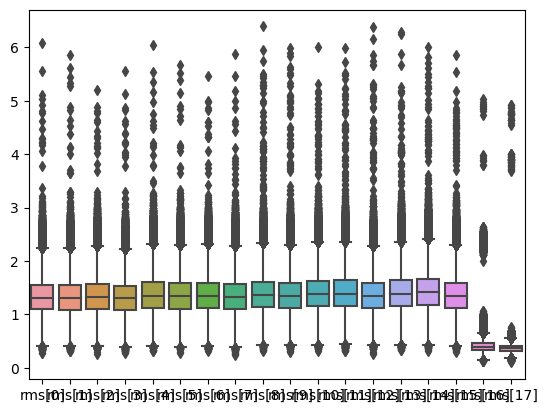

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=rms_df)
plt.show()

In [23]:
# Find six outliers columns from the box plot of rms
index_count_list[16]+= 1
index_count_list[17]+= 1

# The denser the top of the box plot, the fewer outliers.
index_count_list[2]+= 1
index_count_list[5]+= 1

index_count_list[1]+= 1
index_count_list[6]+= 1




In [24]:
index_count_list

[0, 2, 2, 2, 0, 2, 3, 0, 0, 1, 2, 2, 1, 1, 0, 3, 4, 5]

In [25]:
top_six_columns_index = sorted(enumerate(index_count_list), key=lambda x: x[1], reverse=True)[:6]

top_six_columns_index

[(17, 5), (16, 4), (6, 3), (15, 3), (1, 2), (2, 2)]

In [ ]:
# 6 15 16 17 